## import library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Membaca dataset


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Persiapan Dataset

In [4]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df.drop(['CustomerID', 'Gender'],  axis=1) ## menghapus colums customers dan age

In [8]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


## Menentukan jumlah cluster dengan elbow

c:\Users\andhi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\andhi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\andhi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andhi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\andhi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Text(5, 150000, 'Possible elbow point')

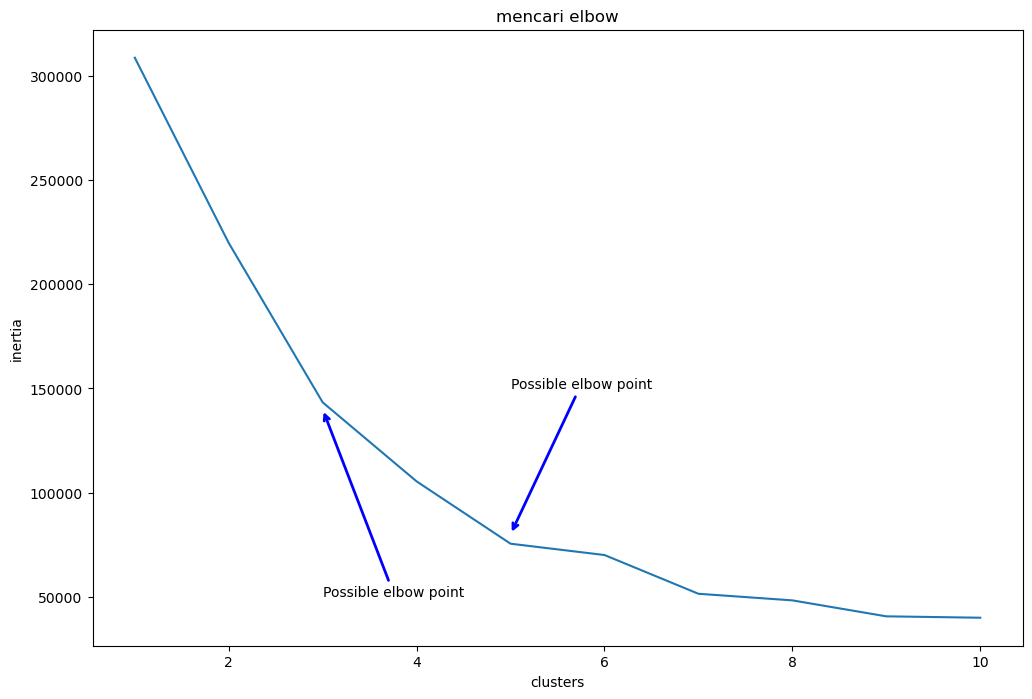

In [9]:
clusters =[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000),xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000),xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

## Proses clustering

In [107]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\andhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


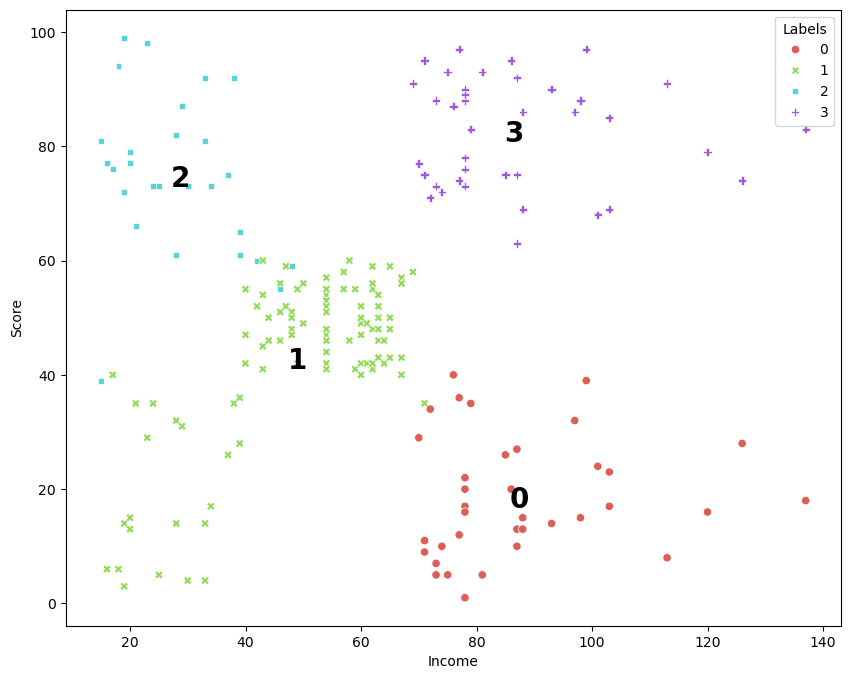

In [108]:
plt.figure(figsize=(10, 8))

# Create the scatter plot
sns.scatterplot(
    x='Income',
    y='Score',
    hue='Labels',
    style='Labels',  # Different markers for each cluster
    data=X,
    palette=sns.color_palette('hls', n_clust)
)

# Annotate cluster centers with unique labels
for label in X['Labels'].unique():
    plt.annotate(
        label,
        (X[X['Labels'] == label]['Income'].mean(),
         X[X['Labels'] == label]['Score'].mean()),
        horizontalalignment='center',
        verticalalignment='center',
        size=20,
        weight='bold',
        color='black'
    )

In [109]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       1
3     23      16     77       2
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       3
196   45     126     28       0
197   32     126     74       3
198   32     137     18       0
199   30     137     83       3

[200 rows x 4 columns]


In [110]:
X.to_excel("output_cluster.xlsx") ## mengeluarkan hasil cluster ke dalam excel